In [1]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings

warnings.filterwarnings(action="ignore")

# Set up professional styling
plt.style.use(style="seaborn-v0_8-whitegrid")
sns.set_palette(palette="husl")

In [2]:
# Load the actual CSV files using Polars
print("Loading data files...")

try:
    # Load PO data
    po_df = pl.read_csv("../../geolifeclef-2025/GLC25_P0_metadata_train.csv")
    print(f"PO Data loaded: {po_df.shape[0]} rows, {po_df.shape[1]} columns")

    # Load PA data
    pa_df = pl.read_csv("../../geolifeclef-2025/GLC25_PA_metadata_train.csv")
    print(f"PA Data loaded: {pa_df.shape[0]} rows, {pa_df.shape[1]} columns")

    # Take random samples for visualization (to make plots manageable)
    sample_size_po = min(10000, po_df.shape[0])
    sample_size_pa = min(5000, pa_df.shape[0])

    po_sample = po_df.sample(n=sample_size_po, seed=42)
    pa_sample = pa_df.sample(n=sample_size_pa, seed=42)

    print(f"Using samples: PO={sample_size_po}, PA={sample_size_pa}")

except Exception as e:
    print(f"Error loading files: {e}")
    print("Please ensure the CSV files are in the current directory")
    exit()

# Display basic info about the datasets
print("\n" + "=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print("PO Data Columns:", po_df.columns)
print("PA Data Columns:", pa_df.columns)
print("\nPO Data Sample:")
print(po_sample.head())
print("\nPA Data Sample:")
print(pa_sample.head())
print("=" * 60)

Loading data files...
PO Data loaded: 5079797 rows, 12 columns
PA Data loaded: 1483637 rows, 9 columns
Using samples: PO=10000, PA=5000

DATASET OVERVIEW
PO Data Columns: ['publisher', 'year', 'month', 'day', 'lat', 'lon', 'geoUncertaintyInM', 'taxonRank', 'date', 'dayOfYear', 'speciesId', 'surveyId']
PA Data Columns: ['lon', 'lat', 'year', 'geoUncertaintyInM', 'areaInM2', 'region', 'country', 'speciesId', 'surveyId']

PO Data Sample:
shape: (5, 12)
┌────────────────────────┬──────┬───────┬──────┬───┬────────────┬───────────┬───────────┬──────────┐
│ publisher              ┆ year ┆ month ┆ day  ┆ … ┆ date       ┆ dayOfYear ┆ speciesId ┆ surveyId │
│ ---                    ┆ ---  ┆ ---   ┆ ---  ┆   ┆ ---        ┆ ---       ┆ ---       ┆ ---      │
│ str                    ┆ i64  ┆ f64   ┆ f64  ┆   ┆ str        ┆ i64       ┆ f64       ┆ i64      │
╞════════════════════════╪══════╪═══════╪══════╪═══╪════════════╪═══════════╪═══════════╪══════════╡
│ Observation.org        ┆ 2017 ┆ 7.0   ┆

Loading data files...
PO Data loaded: 5079797 rows, 12 columns
PA Data loaded: 1483637 rows, 9 columns
Using samples: PO=10000, PA=5000

DATASET OVERVIEW
PO Data Columns: ['publisher', 'year', 'month', 'day', 'lat', 'lon', 'geoUncertaintyInM', 'taxonRank', 'date', 'dayOfYear', 'speciesId', 'surveyId']
PA Data Columns: ['lon', 'lat', 'year', 'geoUncertaintyInM', 'areaInM2', 'region', 'country', 'speciesId', 'surveyId']

PO Data Sample:
shape: (5, 12)
┌────────────────────────┬──────┬───────┬──────┬───┬────────────┬───────────┬───────────┬──────────┐
│ publisher              ┆ year ┆ month ┆ day  ┆ … ┆ date       ┆ dayOfYear ┆ speciesId ┆ surveyId │
│ ---                    ┆ ---  ┆ ---   ┆ ---  ┆   ┆ ---        ┆ ---       ┆ ---       ┆ ---      │
│ str                    ┆ i64  ┆ f64   ┆ f64  ┆   ┆ str        ┆ i64       ┆ f64       ┆ i64      │
╞════════════════════════╪══════╪═══════╪══════╪═══╪════════════╪═══════════╪═══════════╪══════════╡
│ Observation.org        ┆ 2017 ┆ 7.0   ┆

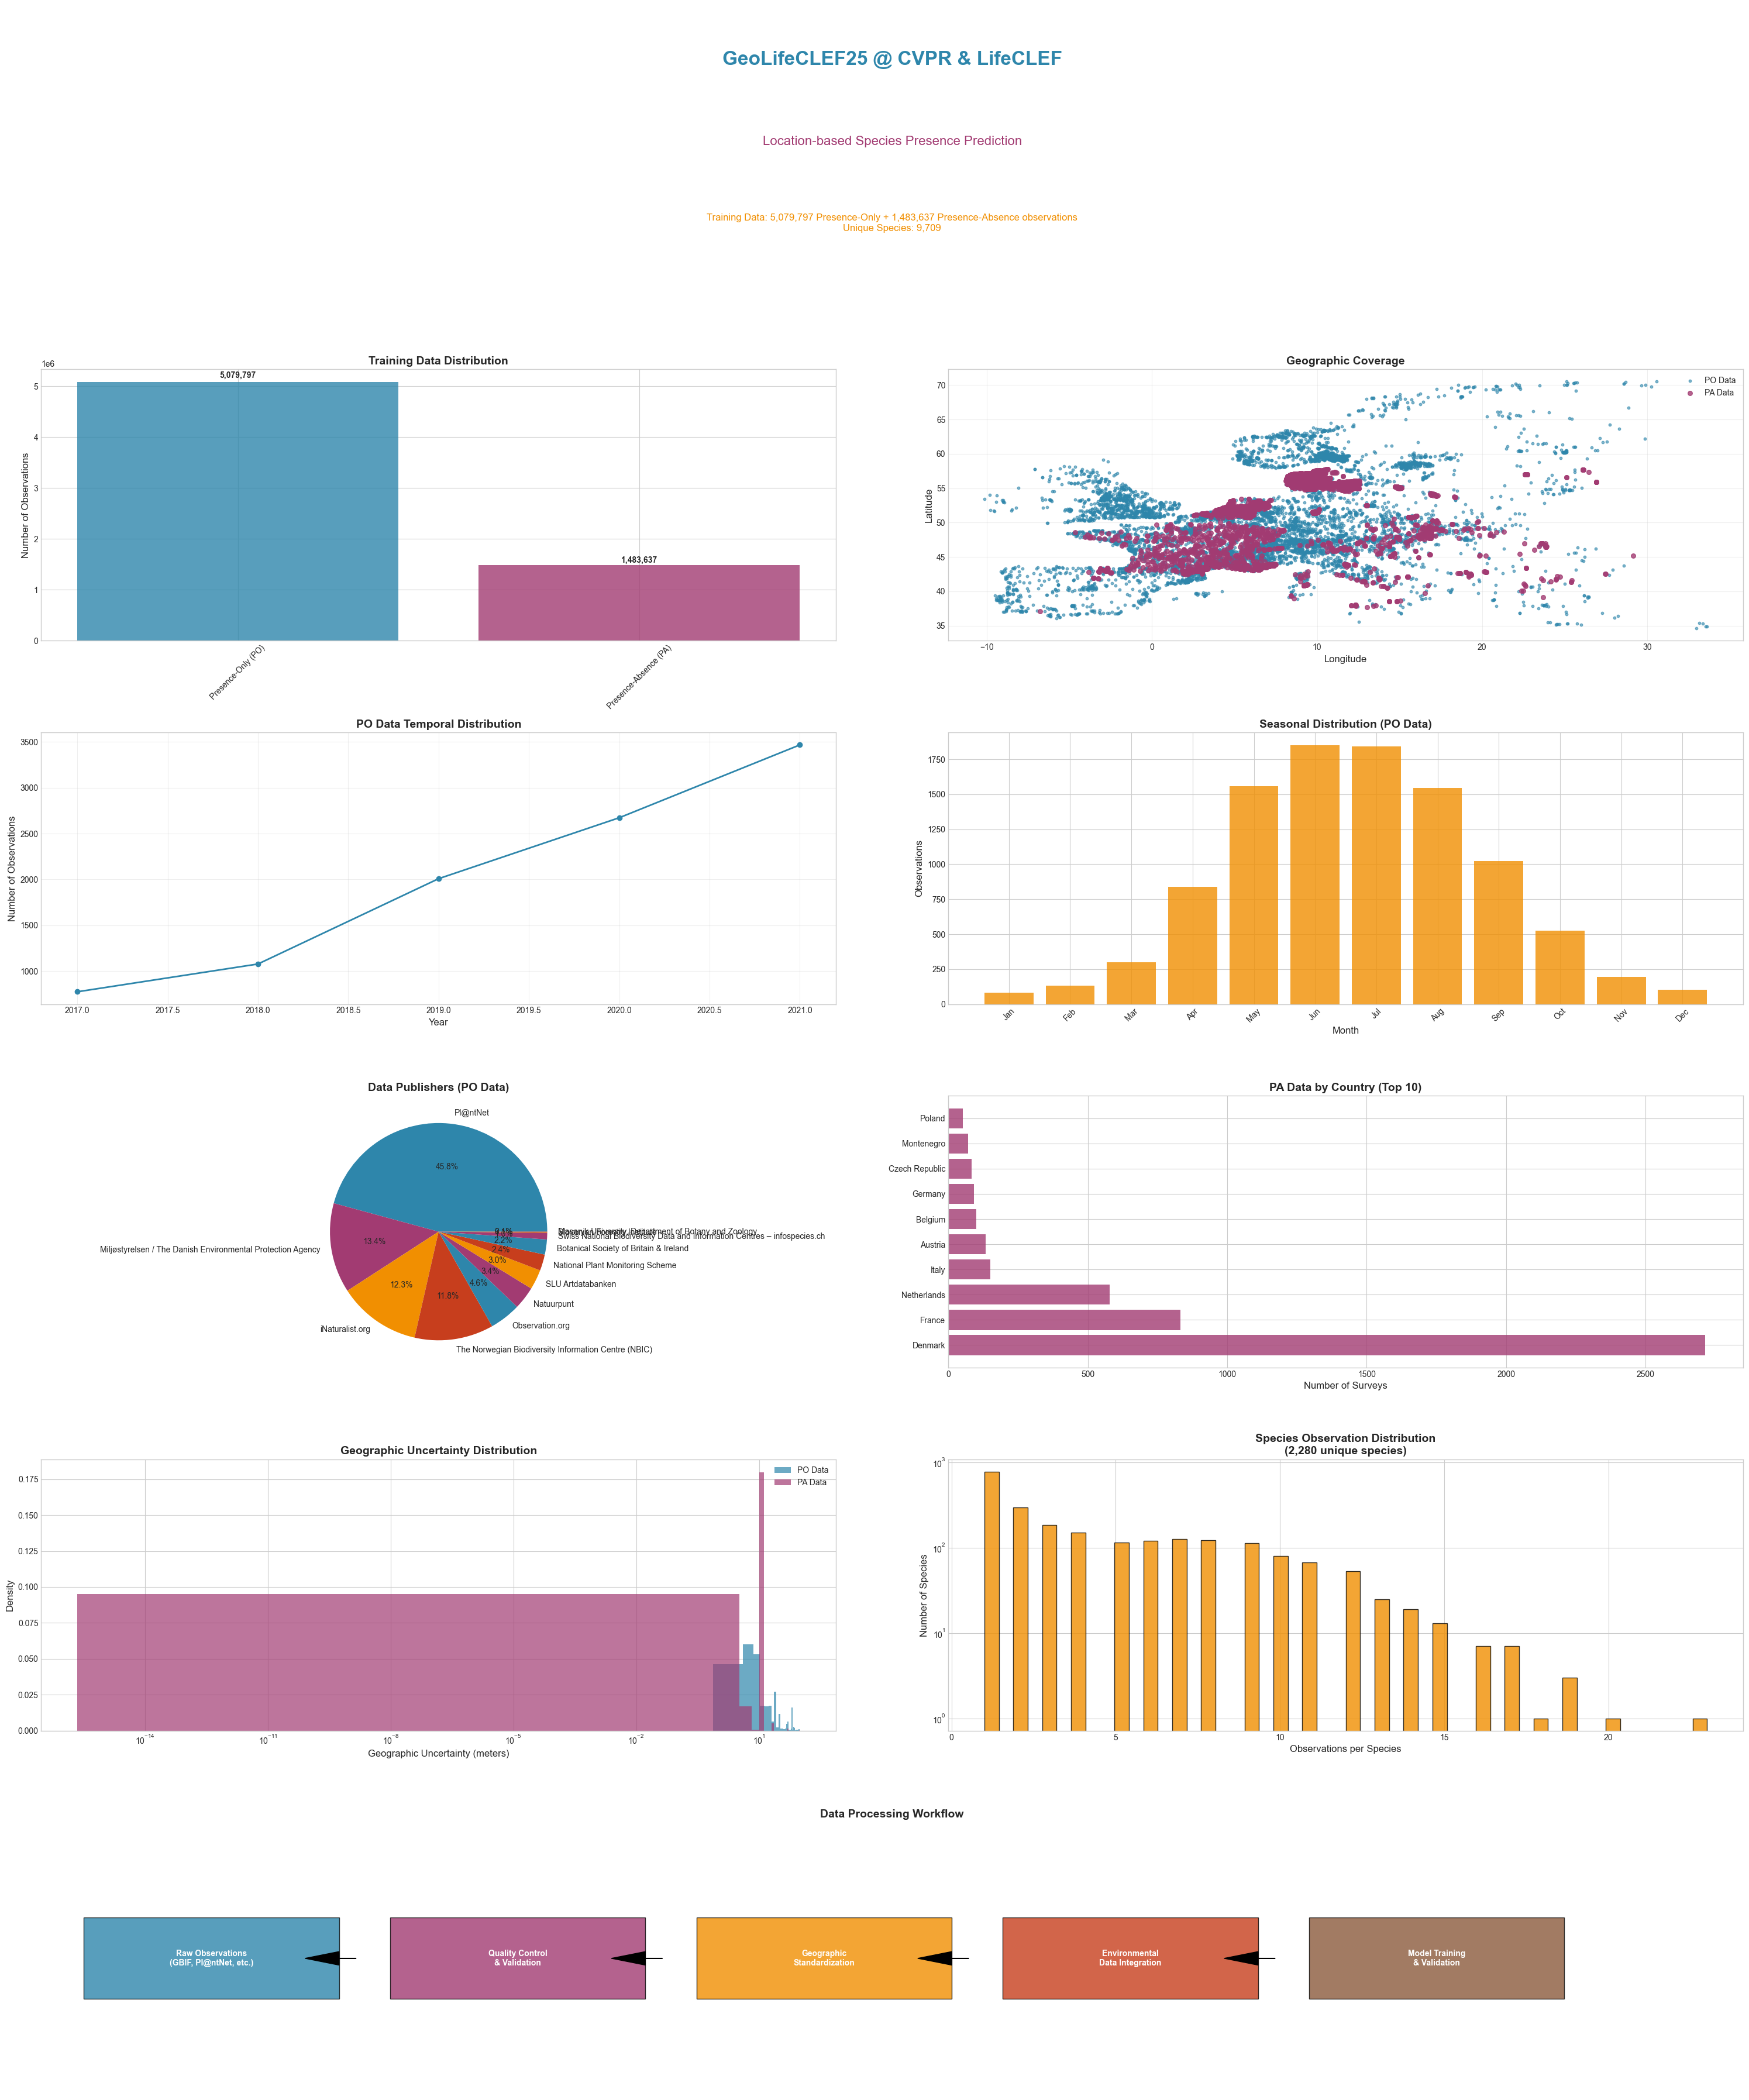

Creating interactive map...



GEOLIFECLEF25 DATASET DETAILED SUMMARY
PRESENCE-ONLY (PO) DATA:
  Total Observations: 5,079,797
  Unique Species: 9,709
  Date Range: 2017 - 2021
  Publishers: Botanical Society of Britain & Ireland, Pl@ntNet, Natuurpunt, iNaturalist.org, Masaryk University, Department of Botany and Zoology, Swiss National Biodiversity Data and Information Centres – infospecies.ch, Observation.org, Slovenian Forestry Institute, Miljøstyrelsen / The Danish Environmental Protection Agency, National Plant Monitoring Scheme, SLU Artdatabanken, The Norwegian Biodiversity Information Centre (NBIC)
  Geographic Bounds:
    Latitude: 34.57 to 71.18
    Longitude: -10.54 to 34.56

PRESENCE-ABSENCE (PA) DATA:
  Total Surveys: 1,483,637
  Date Range: 2017 - 2021
  Countries: Austria, Poland, Hungary, Bosnia and Herzegovina, Croatia, Belgium, Slovakia, Portugal, Serbia, Andorra, Netherlands, Montenegro, Romania, Monaco, Germany, Switzerland, Bulgaria, Greece, Latvia, The former Yugoslav Republic of Macedonia, Nor

In [3]:
# Load the actual CSV files using Polars
print("Loading data files...")

try:
    # Load PO data
    po_df = pl.read_csv("../../geolifeclef-2025/GLC25_P0_metadata_train.csv")
    print(f"PO Data loaded: {po_df.shape[0]} rows, {po_df.shape[1]} columns")

    # Load PA data
    pa_df = pl.read_csv("../../geolifeclef-2025/GLC25_PA_metadata_train.csv")
    print(f"PA Data loaded: {pa_df.shape[0]} rows, {pa_df.shape[1]} columns")

    # Take random samples for visualization (to make plots manageable)
    sample_size_po = min(10000, po_df.shape[0])
    sample_size_pa = min(5000, pa_df.shape[0])

    po_sample = po_df.sample(n=sample_size_po, seed=42)
    pa_sample = pa_df.sample(n=sample_size_pa, seed=42)

    print(f"Using samples: PO={sample_size_po}, PA={sample_size_pa}")

except Exception as e:
    print(f"Error loading files: {e}")
    print("Please ensure the CSV files are in the current directory")
    exit()

# Display basic info about the datasets
print("\n" + "=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print("PO Data Columns:", po_df.columns)
print("PA Data Columns:", pa_df.columns)
print("\nPO Data Sample:")
print(po_sample.head())
print("\nPA Data Sample:")
print(pa_sample.head())
print("=" * 60)

# Create comprehensive visualization dashboard
fig = plt.figure(figsize=(20 * 1.5, 24 * 1.5))

# 1. Competition Overview (Top section)
ax1 = plt.subplot2grid((6, 4), (0, 0), colspan=4, rowspan=1)

ax1.text(
    0.5,
    0.8,
    "GeoLifeCLEF25 @ CVPR & LifeCLEF",
    ha="center",
    va="center",
    fontsize=24,
    fontweight="bold",
    color="#2E86AB",
)

ax1.text(
    0.5,
    0.5,
    "Location-based Species Presence Prediction",
    ha="center",
    va="center",
    fontsize=16,
    color="#A23B72",
)

ax1.text(
    0.5,
    0.2,
    f"Training Data: {po_df.shape[0]:,} Presence-Only + {pa_df.shape[0]:,} Presence-Absence observations\nUnique Species: {po_df['speciesId'].n_unique():,}",
    ha="center",
    va="center",
    fontsize=12,
    color="#F18F01",
)

ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.axis("off")

# 2. Data Type Distribution
ax2 = plt.subplot2grid((6, 4), (1, 0), colspan=2)
data_types = ["Presence-Only (PO)", "Presence-Absence (PA)"]
data_counts = [po_df.shape[0], pa_df.shape[0]]
colors = ["#2E86AB", "#A23B72"]

bars = ax2.bar(data_types, data_counts, color=colors, alpha=0.8)
ax2.set_ylabel("Number of Observations", fontsize=12)
ax2.set_title("Training Data Distribution", fontsize=14, fontweight="bold")
ax2.tick_params(axis="x", rotation=45)

# Add value labels on bars
for bar, count in zip(bars, data_counts):
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + height * 0.01,
        f"{count:,}",
        ha="center",
        va="bottom",
        fontweight="bold",
    )

# 3. Geographic Distribution
ax3 = plt.subplot2grid((6, 4), (1, 2), colspan=2)

# Convert to pandas for matplotlib (temporary conversion just for plotting)
po_plot_data = po_sample.to_pandas()
pa_plot_data = pa_sample.to_pandas()

scatter_po = ax3.scatter(
    po_plot_data["lon"],
    po_plot_data["lat"],
    c="#2E86AB",
    alpha=0.6,
    s=10,
    label="PO Data",
)

scatter_pa = ax3.scatter(
    pa_plot_data["lon"],
    pa_plot_data["lat"],
    c="#A23B72",
    alpha=0.8,
    s=30,
    label="PA Data",
)

ax3.set_xlabel("Longitude", fontsize=12)
ax3.set_ylabel("Latitude", fontsize=12)
ax3.set_title("Geographic Coverage", fontsize=14, fontweight="bold")
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Temporal Distribution - PO Data
ax4 = plt.subplot2grid((6, 4), (2, 0), colspan=2)
yearly_counts = po_sample.group_by("year").len().sort(by="year")
ax4.plot(
    yearly_counts["year"].to_list(),
    yearly_counts["len"].to_list(),
    marker="o",
    linewidth=2,
    markersize=6,
    color="#2E86AB",
)
ax4.set_xlabel(xlabel="Year", fontsize=12)
ax4.set_ylabel(ylabel="Number of Observations", fontsize=12)
ax4.set_title(label="PO Data Temporal Distribution", fontsize=14, fontweight="bold")
ax4.grid(visible=True, alpha=0.3)

# 5. Monthly Seasonality
ax5 = plt.subplot2grid((6, 4), (2, 2), colspan=2)
monthly_counts = po_sample.group_by("month").len().sort("month")
months = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]

# Create a complete month range and fill missing months with 0
month_dict = dict(
    zip(monthly_counts["month"].to_list(), monthly_counts["len"].to_list())
)
month_values = [month_dict.get(i, 0) for i in range(1, 13)]

ax5.bar(range(1, 13), month_values, color="#F18F01", alpha=0.8)
ax5.set_xlabel("Month", fontsize=12)
ax5.set_ylabel("Observations", fontsize=12)
ax5.set_title("Seasonal Distribution (PO Data)", fontsize=14, fontweight="bold")
ax5.set_xticks(range(1, 13))
ax5.set_xticklabels(months, rotation=45)

# 6. Publisher Distribution
ax6 = plt.subplot2grid((6, 4), (3, 0), colspan=2)
publisher_counts = po_sample.group_by("publisher").len().sort("len", descending=True)
publisher_names = publisher_counts["publisher"].to_list()
publisher_values = publisher_counts["len"].to_list()

wedges, texts, autotexts = ax6.pie(
    x=publisher_values,
    labels=publisher_names,
    autopct="%1.1f%%",
    colors=["#2E86AB", "#A23B72", "#F18F01", "#C73E1D"],
)
ax6.set_title(label="Data Publishers (PO Data)", fontsize=14, fontweight="bold")

# 7. Regional Distribution - PA Data
ax7 = plt.subplot2grid((6, 4), (3, 2), colspan=2)

country_counts = (
    pa_sample.group_by("country").len().sort("len", descending=True).head(10)
)
country_names = country_counts["country"].to_list()
country_values = country_counts["len"].to_list()

bars = ax7.barh(country_names, country_values, color="#A23B72", alpha=0.8)
ax7.set_xlabel("Number of Surveys", fontsize=12)
ax7.set_title("PA Data by Country (Top 10)", fontsize=14, fontweight="bold")

# 8. Uncertainty Analysis
ax8 = plt.subplot2grid((6, 4), (4, 0), colspan=2)

po_uncertainty = po_sample["geoUncertaintyInM"].drop_nulls().to_list()

pa_uncertainty = pa_sample["geoUncertaintyInM"].drop_nulls().to_list()

if po_uncertainty:
    ax8.hist(
        po_uncertainty,
        bins=30,
        alpha=0.7,
        color="#2E86AB",
        label="PO Data",
        density=True,
    )

if pa_uncertainty:
    ax8.hist(
        pa_uncertainty,
        bins=30,
        alpha=0.7,
        color="#A23B72",
        label="PA Data",
        density=True,
    )

ax8.set_xlabel("Geographic Uncertainty (meters)", fontsize=12)
ax8.set_ylabel("Density", fontsize=12)
ax8.set_title("Geographic Uncertainty Distribution", fontsize=14, fontweight="bold")
ax8.legend()

if po_uncertainty or pa_uncertainty:
    ax8.set_xscale("log")

# 9. Species Richness Analysis
ax9 = plt.subplot2grid((6, 4), (4, 2), colspan=2)
unique_species = po_sample["speciesId"].n_unique()
species_counts = po_sample.group_by("speciesId").len().sort("len", descending=True)
observations_per_species = species_counts["len"].to_list()

ax9.hist(
    observations_per_species, bins=50, color="#F18F01", alpha=0.8, edgecolor="black"
)
ax9.set_xlabel("Observations per Species", fontsize=12)
ax9.set_ylabel("Number of Species", fontsize=12)
ax9.set_title(
    f"Species Observation Distribution\n({unique_species:,} unique species)",
    fontsize=14,
    fontweight="bold",
)
ax9.set_yscale("log")

# 10. Data Processing Workflow
ax10 = plt.subplot2grid((6, 4), (5, 0), colspan=4)

workflow_steps = [
    "Raw Observations\n(GBIF, Pl@ntNet, etc.)",
    "Quality Control\n& Validation",
    "Geographic\nStandardization",
    "Environmental\nData Integration",
    "Model Training\n& Validation",
]

# Create workflow diagram
step_width = 0.15
step_height = 0.3
y_center = 0.5

for i, step in enumerate(workflow_steps):
    x_pos = 0.1 + i * 0.18

    # Draw rectangle
    rect = Rectangle(
        (x_pos - step_width / 2, y_center - step_height / 2),
        step_width,
        step_height,
        facecolor=["#2E86AB", "#A23B72", "#F18F01", "#C73E1D", "#8B5A3C"][i],
        alpha=0.8,
        edgecolor="black",
    )
    ax10.add_patch(rect)

    # Add text
    ax10.text(
        x_pos,
        y_center,
        step,
        ha="center",
        va="center",
        fontsize=10,
        fontweight="bold",
        color="white",
    )

    # Add arrow
    if i < len(workflow_steps) - 1:
        ax10.arrow(
            x_pos + step_width / 2 + 0.01,
            y_center,
            0.16 - step_width - 0.02,
            0,
            head_width=0.05,
            head_length=0.02,
            fc="black",
            ec="black",
        )

ax10.set_xlim(0, 1)
ax10.set_ylim(0, 1)
ax10.set_title("Data Processing Workflow", fontsize=14, fontweight="bold")
ax10.axis("off")

plt.tight_layout()
plt.savefig("GeoLifeCLEF25_Overview.png", dpi=300, bbox_inches="tight")
plt.show()

# Create an interactive map visualization using actual data
print("Creating interactive map...")

# Sample smaller subset for interactive map (for performance)
map_sample_po = po_sample.sample(n=min(1000, po_sample.shape[0]), seed=42).to_pandas()
map_sample_pa = pa_sample.sample(n=min(500, pa_sample.shape[0]), seed=42).to_pandas()

fig_map = go.Figure()

# Add PO data points
fig_map.add_trace(
    go.Scattermapbox(
        lat=map_sample_po["lat"],
        lon=map_sample_po["lon"],
        mode="markers",
        marker=dict(size=4, color="blue", opacity=0.6),
        name="Presence-Only Data",
        text=[
            f"Publisher: {pub}<br>Year: {year}<br>Species ID: {species}"
            for pub, year, species in zip(
                map_sample_po["publisher"],
                map_sample_po["year"],
                map_sample_po["speciesId"],
            )
        ],
    )
)

# Add PA data points
fig_map.add_trace(
    go.Scattermapbox(
        lat=map_sample_pa["lat"],
        lon=map_sample_pa["lon"],
        mode="markers",
        marker=dict(size=8, color="red", opacity=0.8),
        name="Presence-Absence Data",
        text=[
            f"Country: {country}<br>Year: {year}<br>Region: {region}"
            for country, year, region in zip(
                map_sample_pa["country"],
                map_sample_pa["year"],
                map_sample_pa.get("region", ["Unknown"] * len(map_sample_pa)),
            )
        ],
    )
)

fig_map.update_layout(
    title="GeoLifeCLEF25: European Species Observation Distribution",
    mapbox=dict(style="open-street-map", center=dict(lat=50, lon=10), zoom=3.5),
    height=600,
    width=1000,
)

fig_map.show()

# Detailed Summary Statistics using Polars
print("\n" + "=" * 80)
print("GEOLIFECLEF25 DATASET DETAILED SUMMARY")
print("=" * 80)

print(f"PRESENCE-ONLY (PO) DATA:")
print(f"  Total Observations: {po_df.shape[0]:,}")
print(f"  Unique Species: {po_df['speciesId'].n_unique():,}")
print(f"  Date Range: {po_df['year'].min()} - {po_df['year'].max()}")
print(f"  Publishers: {', '.join(po_df['publisher'].unique().to_list())}")
print(f"  Geographic Bounds:")
print(f"    Latitude: {po_df['lat'].min():.2f} to {po_df['lat'].max():.2f}")
print(f"    Longitude: {po_df['lon'].min():.2f} to {po_df['lon'].max():.2f}")

print(f"\nPRESENCE-ABSENCE (PA) DATA:")
print(f"  Total Surveys: {pa_df.shape[0]:,}")
print(f"  Date Range: {pa_df['year'].min()} - {pa_df['year'].max()}")
print(f"  Countries: {', '.join(pa_df['country'].unique().to_list())}")
if "region" in pa_df.columns:
    print(f"  Regions: {', '.join(pa_df['region'].unique().to_list())}")
print(f"  Geographic Bounds:")
print(f"    Latitude: {pa_df['lat'].min():.2f} to {pa_df['lat'].max():.2f}")
print(f"    Longitude: {pa_df['lon'].min():.2f} to {pa_df['lon'].max():.2f}")

print(f"\nDATA QUALITY METRICS:")
po_null_geo = po_df.filter((pl.col("lat").is_null()) | (pl.col("lon").is_null())).shape[
    0
]
pa_null_geo = pa_df.filter((pl.col("lat").is_null()) | (pl.col("lon").is_null())).shape[
    0
]
print(f"  Missing Geographic Coordinates:")
print(f"    PO Data: {po_null_geo:,} ({po_null_geo / po_df.shape[0] * 100:.2f}%)")
print(f"    PA Data: {pa_null_geo:,} ({pa_null_geo / pa_df.shape[0] * 100:.2f}%)")

# # Uncertainty statistics
# po_uncertainty_stats = po_df["geoUncertaintyInM"].filter(
#     pl.col("geoUncertaintyInM").is_not_null()
# )
# pa_uncertainty_stats = pa_df["geoUncertaintyInM"].filter(
#     pl.col("geoUncertaintyInM").is_not_null()
# )

# if len(po_uncertainty_stats) > 0:
#     print(
#         f"  Geographic Uncertainty (PO): Mean={po_uncertainty_stats.mean():.1f}m, Median={po_uncertainty_stats.median():.1f}m"
#     )
# if len(pa_uncertainty_stats) > 0:
#     print(
#         f"  Geographic Uncertainty (PA): Mean={pa_uncertainty_stats.mean():.1f}m, Median={pa_uncertainty_stats.median():.1f}m"
#     )

# print("=" * 80)

# Additional analysis: Top species and publishers
print("\nTOP 10 MOST OBSERVED SPECIES (PO Data):")
top_species = po_df.group_by("speciesId").len().sort("len", descending=True).head(10)
for row in top_species.iter_rows():
    print(f"  Species ID {row[0]}: {row[1]:,} observations")

print("\nPUBLISHER CONTRIBUTION (PO Data):")
publisher_stats = po_df.group_by("publisher").len().sort("len", descending=True)
for row in publisher_stats.iter_rows():
    percentage = row[1] / po_df.shape[0] * 100
    print(f"  {row[0]}: {row[1]:,} observations ({percentage:.1f}%)")

print("\nCOUNTRY DISTRIBUTION (PA Data):")
country_stats = pa_df.group_by("country").len().sort("len", descending=True)
for row in country_stats.iter_rows():
    percentage = row[1] / pa_df.shape[0] * 100
    print(f"  {row[0]}: {row[1]:,} surveys ({percentage:.1f}%)")

In [4]:
# import polars as pl
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# from matplotlib.patches import Rectangle
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# # Create a comprehensive explanation visualization
# fig, axes = plt.subplots(3, 2, figsize=(16, 18))
# fig.suptitle(
#     "Presence-Only (PO) vs Presence-Absence (PA) Data Explained",
#     fontsize=20,
#     fontweight="bold",
# )

# # 1. Conceptual Difference
# ax1 = axes[0, 0]
# ax1.text(
#     0.5,
#     0.9,
#     "PRESENCE-ONLY (PO) DATA",
#     ha="center",
#     va="center",
#     fontsize=14,
#     fontweight="bold",
#     color="#2E86AB",
# )
# ax1.text(
#     0.5,
#     0.7,
#     '• Records ONLY where species was observed\n• No information about absences\n• "I saw species X at location Y"\n• Cannot distinguish true absence from\n  non-detection',
#     ha="center",
#     va="center",
#     fontsize=11,
#     bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7),
# )
# ax1.text(
#     0.5,
#     0.3,
#     'Example:\n"Oak tree observed at\nlatitude 45.5, longitude 2.3"',
#     ha="center",
#     va="center",
#     fontsize=10,
#     style="italic",
#     bbox=dict(boxstyle="round,pad=0.3", facecolor="#E8F4F8"),
# )
# ax1.set_xlim(0, 1)
# ax1.set_ylim(0, 1)
# ax1.axis("off")

# ax2 = axes[0, 1]
# ax2.text(
#     0.5,
#     0.9,
#     "PRESENCE-ABSENCE (PA) DATA",
#     ha="center",
#     va="center",
#     fontsize=14,
#     fontweight="bold",
#     color="#A23B72",
# )
# ax2.text(
#     0.5,
#     0.7,
#     '• Records BOTH presence AND absence\n• Systematic surveys with protocols\n• "I looked for species X and found/didn\'t find it"\n• Reliable absence information',
#     ha="center",
#     va="center",
#     fontsize=11,
#     bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.7),
# )
# ax2.text(
#     0.5,
#     0.3,
#     'Example:\n"Surveyed 1m² plot:\nOak: Present\nMaple: Absent\nBirch: Present"',
#     ha="center",
#     va="center",
#     fontsize=10,
#     style="italic",
#     bbox=dict(boxstyle="round,pad=0.3", facecolor="#F8E8E8"),
# )
# ax2.set_xlim(0, 1)
# ax2.set_ylim(0, 1)
# ax2.axis("off")

# # 2. Data Collection Methods
# ax3 = axes[1, 0]
# ax3.text(
#     0.5,
#     0.95,
#     "PO Data Collection",
#     ha="center",
#     va="center",
#     fontsize=12,
#     fontweight="bold",
#     color="#2E86AB",
# )

# # Create a simple diagram showing opportunistic observation
# sources = [
#     "Citizen Science\n(iNaturalist)",
#     "Photo Databases\n(Pl@ntNet)",
#     "Museum Records\n(GBIF)",
#     "Casual Observations",
# ]
# y_positions = [0.8, 0.65, 0.5, 0.35]
# colors = ["#4CAF50", "#FF9800", "#9C27B0", "#607D8B"]

# for i, (source, y_pos, color) in enumerate(zip(sources, y_positions, colors)):
#     ax3.add_patch(Rectangle((0.1, y_pos - 0.05), 0.8, 0.1, facecolor=color, alpha=0.7))
#     ax3.text(
#         0.5,
#         y_pos,
#         source,
#         ha="center",
#         va="center",
#         fontsize=9,
#         fontweight="bold",
#         color="white",
#     )

# ax3.text(
#     0.5,
#     0.15,
#     "Opportunistic, Unstructured",
#     ha="center",
#     va="center",
#     fontsize=10,
#     fontweight="bold",
#     color="red",
# )
# ax3.set_xlim(0, 1)
# ax3.set_ylim(0, 1)
# ax3.axis("off")

# ax4 = axes[1, 1]
# ax4.text(
#     0.5,
#     0.95,
#     "PA Data Collection",
#     ha="center",
#     va="center",
#     fontsize=12,
#     fontweight="bold",
#     color="#A23B72",
# )

# # Create diagram showing systematic survey
# survey_steps = [
#     "Define Survey Area",
#     "Systematic Protocol",
#     "Record All Species",
#     "Note Absences",
# ]
# y_positions = [0.8, 0.65, 0.5, 0.35]

# for i, (step, y_pos) in enumerate(zip(survey_steps, y_positions)):
#     ax4.add_patch(
#         Rectangle((0.1, y_pos - 0.05), 0.8, 0.1, facecolor="#A23B72", alpha=0.7)
#     )
#     ax4.text(
#         0.5,
#         y_pos,
#         f"{i + 1}. {step}",
#         ha="center",
#         va="center",
#         fontsize=9,
#         fontweight="bold",
#         color="white",
#     )

# ax4.text(
#     0.5,
#     0.15,
#     "Structured, Systematic",
#     ha="center",
#     va="center",
#     fontsize=10,
#     fontweight="bold",
#     color="green",
# )
# ax4.set_xlim(0, 1)
# ax4.set_ylim(0, 1)
# ax4.axis("off")

# # 3. Bias Comparison
# ax5 = axes[2, 0]
# ax5.text(
#     0.5,
#     0.95,
#     "PO Data Biases",
#     ha="center",
#     va="center",
#     fontsize=12,
#     fontweight="bold",
#     color="#2E86AB",
# )

# biases = [
#     "🌸 Attractive species bias",
#     "🛤️ Accessibility bias (roads, trails)",
#     "👥 Observer density bias (urban areas)",
#     "📅 Temporal bias (weekends, seasons)",
#     "🔍 Detection bias (easy to spot species)",
#     "❌ No true absence information",
# ]

# for i, bias in enumerate(biases):
#     ax5.text(0.05, 0.8 - i * 0.12, bias, ha="left", va="center", fontsize=9)

# ax5.set_xlim(0, 1)
# ax5.set_ylim(0, 1)
# ax5.axis("off")

# ax6 = axes[2, 1]
# ax6.text(
#     0.5,
#     0.95,
#     "PA Data Advantages",
#     ha="center",
#     va="center",
#     fontsize=12,
#     fontweight="bold",
#     color="#A23B72",
# )

# advantages = [
#     "✅ Reliable absence data",
#     "📊 Unbiased sampling protocol",
#     "🎯 Representative species coverage",
#     "📏 Standardized effort",
#     "🔬 Scientific rigor",
#     "📈 Better for modeling",
# ]

# for i, advantage in enumerate(advantages):
#     ax6.text(0.05, 0.8 - i * 0.12, advantage, ha="left", va="center", fontsize=9)

# ax6.set_xlim(0, 1)
# ax6.set_ylim(0, 1)
# ax6.axis("off")

# plt.tight_layout()
# plt.savefig("PO_vs_PA_Explanation.png", dpi=300, bbox_inches="tight")
# plt.show()

# # Create a detailed comparison table
# print("\n" + "=" * 100)
# print("DETAILED COMPARISON: PRESENCE-ONLY vs PRESENCE-ABSENCE DATA")
# print("=" * 100)

# comparison_data = {
#     "Aspect": [
#         "Data Type",
#         "Sample Size",
#         "Collection Method",
#         "Sampling Bias",
#         "Geographic Coverage",
#         "Temporal Coverage",
#         "Species Coverage",
#         "Data Quality",
#         "Modeling Challenge",
#         "Use Cases",
#         "Advantages",
#         "Disadvantages",
#     ],
#     "Presence-Only (PO)": [
#         "Binary: 1 (present) only",
#         "~5 million observations",
#         "Opportunistic, citizen science",
#         "High - multiple bias sources",
#         "Broad but uneven",
#         "Irregular, event-driven",
#         "Biased toward charismatic species",
#         "Variable, uncontrolled",
#         "Need to model sampling bias",
#         "Large-scale mapping, trend analysis",
#         "Large sample size, broad coverage",
#         "No absence info, multiple biases",
#     ],
#     "Presence-Absence (PA)": [
#         "Binary: 1 (present) or 0 (absent)",
#         "~100,000 surveys",
#         "Systematic, protocol-based",
#         "Low - controlled sampling",
#         "Limited but representative",
#         "Planned, systematic",
#         "Comprehensive within survey area",
#         "High, standardized",
#         "Standard binary classification",
#         "Local modeling, conservation planning",
#         "Reliable absences, unbiased",
#         "Smaller sample size, limited coverage",
#     ],
# }

# # Print formatted table
# for i, aspect in enumerate(comparison_data["Aspect"]):
#     print(
#         f"{aspect:<20} | {comparison_data['Presence-Only (PO)'][i]:<40} | {comparison_data['Presence-Absence (PA)'][i]}"
#     )
#     if i == 0:
#         print("-" * 100)

# print("=" * 100)

# # Statistical Bias Illustration
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
# fig.suptitle("Statistical Challenges: PO vs PA Data", fontsize=16, fontweight="bold")

# # 1. Detection Probability
# x = np.linspace(0, 1, 100)
# # Simulate detection probability curves for different species
# conspicuous_species = 0.9 * np.ones_like(x)  # Always detected
# cryptic_species = 0.3 * np.ones_like(x)  # Often missed
# rare_species = 0.1 + 0.8 * x  # Detection increases with abundance

# ax1.plot(
#     x, conspicuous_species, label="Conspicuous species", linewidth=3, color="green"
# )
# ax1.plot(x, cryptic_species, label="Cryptic species", linewidth=3, color="orange")
# ax1.plot(x, rare_species, label="Rare species", linewidth=3, color="red")
# ax1.set_xlabel("Species Abundance")
# ax1.set_ylabel("Detection Probability")
# ax1.set_title("PO Data: Detection Bias by Species Type")
# ax1.legend()
# ax1.grid(True, alpha=0.3)

# # 2. Sampling Effort Distribution
# effort_locations = np.random.normal(
#     0.5, 0.15, 1000
# )  # Clustered around accessible areas
# effort_locations = np.clip(effort_locations, 0, 1)
# ax2.hist(effort_locations, bins=30, alpha=0.7, color="blue", edgecolor="black")
# ax2.set_xlabel("Geographic Space (0=Remote, 1=Accessible)")
# ax2.set_ylabel("Sampling Effort")
# ax2.set_title("PO Data: Spatial Sampling Bias")
# ax2.axvline(0.5, color="red", linestyle="--", label="Unbiased expectation")
# ax2.legend()

# # 3. True vs Observed Occurrences
# true_occurrences = np.random.binomial(1, 0.4, 1000)  # 40% true occurrence rate
# detection_prob = np.random.beta(2, 3, 1000)  # Variable detection probability
# observed_occurrences = true_occurrences * np.random.binomial(1, detection_prob)

# ax3.scatter(
#     true_occurrences + np.random.normal(0, 0.05, 1000),
#     observed_occurrences + np.random.normal(0, 0.05, 1000),
#     alpha=0.5,
#     s=20,
# )
# ax3.plot([0, 1], [0, 1], "r--", linewidth=2, label="Perfect detection")
# ax3.set_xlabel("True Occurrence (0=Absent, 1=Present)")
# ax3.set_ylabel("Observed in PO Data (0=Not detected, 1=Detected)")
# ax3.set_title("PO Data: Imperfect Detection Problem")
# ax3.legend()
# ax3.grid(True, alpha=0.3)

# # 4. PA Data Reliability
# survey_sites = 100
# species_per_site = 20
# # Simulate PA survey matrix
# pa_matrix = np.random.binomial(1, 0.3, (survey_sites, species_per_site))
# im = ax4.imshow(pa_matrix[:50, :], cmap="RdYlBu", aspect="auto")
# ax4.set_xlabel("Species")
# ax4.set_ylabel("Survey Sites")
# ax4.set_title("PA Data: Complete Species × Site Matrix")
# plt.colorbar(im, ax=ax4, label="Presence (1) / Absence (0)")

# plt.tight_layout()
# plt.savefig("Statistical_Challenges.png", dpi=300, bbox_inches="tight")
# plt.show()

# # Modeling Implications
# print("\n" + "=" * 80)
# print("MODELING IMPLICATIONS FOR GEOLIFECLEF25")
# print("=" * 80)

# print("""
# 🎯 CHALLENGE CONTEXT:
# The GeoLifeCLEF25 competition combines both PO and PA data to leverage their complementary strengths:

# 📊 PO DATA CONTRIBUTION (~5M observations):
#    • Provides broad geographic and taxonomic coverage
#    • Captures rare species and unusual locations
#    • Enables large-scale pattern detection
#    • Requires bias correction techniques

# 🔬 PA DATA CONTRIBUTION (~100K surveys):
#    • Provides ground truth for model calibration
#    • Enables estimation of false absence rates
#    • Helps correct PO data biases
#    • Provides reliable negative examples

# 🧠 MODELING STRATEGIES:

# 1. BIAS CORRECTION APPROACHES:
#    • Target-background methods (MaxEnt-style)
#    • Bias files based on sampling effort
#    • Environmental bias correction
#    • Spatial thinning techniques

# 2. INTEGRATED MODELING:
#    • Use PA data to calibrate PO models
#    • Ensemble methods combining both data types
#    • Hierarchical models with data type as a factor
#    • Transfer learning from PA to PO domains

# 3. SAMPLING BIAS MITIGATION:
#    • Weight observations by inverse sampling probability
#    • Use pseudo-absences informed by PA data
#    • Account for detection probability variation
#    • Spatial and temporal stratification

# 4. EVALUATION CONSIDERATIONS:
#    • PA data provides unbiased evaluation metrics
#    • Cross-validation strategies must account for data type
#    • Geographic and taxonomic stratification needed
#    • Beware of evaluation bias from PO-only test sets
# """)

# print("=" * 80)

# # Create a flowchart showing how to combine PO and PA data
# fig, ax = plt.subplots(1, 1, figsize=(14, 10))

# # Define flowchart elements
# boxes = [
#     {"pos": (2, 9), "text": "PO Data\n~5M obs", "color": "#2E86AB", "size": (1.5, 1)},
#     {
#         "pos": (6, 9),
#         "text": "PA Data\n~100K surveys",
#         "color": "#A23B72",
#         "size": (1.5, 1),
#     },
#     {
#         "pos": (2, 7),
#         "text": "Bias Detection\n& Quantification",
#         "color": "#F18F01",
#         "size": (1.8, 1),
#     },
#     {
#         "pos": (6, 7),
#         "text": "Ground Truth\nCalibration",
#         "color": "#F18F01",
#         "size": (1.8, 1),
#     },
#     {
#         "pos": (4, 5),
#         "text": "Integrated Model\nTraining",
#         "color": "#C73E1D",
#         "size": (2, 1),
#     },
#     {
#         "pos": (4, 3),
#         "text": "Species Distribution\nPredictions",
#         "color": "#8B5A3C",
#         "size": (2, 1),
#     },
#     {
#         "pos": (4, 1),
#         "text": "Model Evaluation\n(PA holdout)",
#         "color": "#2E8B57",
#         "size": (2, 1),
#     },
# ]

# arrows = [
#     ((2, 8.5), (2, 7.5)),  # PO to bias detection
#     ((6, 8.5), (6, 7.5)),  # PA to calibration
#     ((2.9, 6.5), (3.5, 5.5)),  # Bias to integrated
#     ((5.1, 6.5), (4.5, 5.5)),  # Calibration to integrated
#     ((4, 4.5), (4, 3.5)),  # Integrated to predictions
#     ((4, 2.5), (4, 1.5)),  # Predictions to evaluation
# ]

# # Draw boxes
# for box in boxes:
#     rect = Rectangle(
#         (box["pos"][0] - box["size"][0] / 2, box["pos"][1] - box["size"][1] / 2),
#         box["size"][0],
#         box["size"][1],
#         facecolor=box["color"],
#         alpha=0.8,
#         edgecolor="black",
#         linewidth=2,
#     )
#     ax.add_patch(rect)
#     ax.text(
#         box["pos"][0],
#         box["pos"][1],
#         box["text"],
#         ha="center",
#         va="center",
#         fontweight="bold",
#         color="white",
#         fontsize=10,
#     )

# # Draw arrows
# for arrow in arrows:
#     ax.annotate(
#         "",
#         xy=arrow[1],
#         xytext=arrow[0],
#         arrowprops=dict(arrowstyle="->", lw=2, color="black"),
#     )

# ax.set_xlim(0, 8)
# ax.set_ylim(0, 10)
# ax.set_title(
#     "GeoLifeCLEF25: Integrating PO and PA Data for Species Distribution Modeling",
#     fontsize=14,
#     fontweight="bold",
# )
# ax.axis("off")

# plt.tight_layout()
# plt.savefig("Integration_Workflow.png", dpi=300, bbox_inches="tight")
# plt.show()


🎯 COMPREHENSIVE SPECTRAL ANALYSIS INCLUDING SAVI AND SR

SEARCHING FOR AVAILABLE SATELLITE IMAGES
🔎 SEARCHING FOR AVAILABLE IMAGES in ../../geolifeclef-2025/SatelitePatches/PA-train
📁 Found CD folder: 00
   📁 Found AB folder: 00
      📄 Found 9 TIFF files: ['1160000.tiff', '1300000.tiff', '1470000.tiff', '1610000.tiff', '1930000.tiff']...
   📁 Found AB folder: 01
      📄 Found 8 TIFF files: ['1010100.tiff', '1530100.tiff', '2270100.tiff', '300100.tiff', '310100.tiff']...
   📁 Found AB folder: 02
      📄 Found 2 TIFF files: ['1410200.tiff', '3160200.tiff']...
   📁 Found AB folder: 03
      📄 Found 8 TIFF files: ['1260300.tiff', '1880300.tiff', '3080300.tiff', '3790300.tiff', '510300.tiff']...
   📁 Found AB folder: 04
      📄 Found 16 TIFF files: ['100400.tiff', '1080400.tiff', '1400400.tiff', '1510400.tiff', '1640400.tiff']...
   📁 Found AB folder: 05
      📄 Found 15 TIFF files: ['1040500.tiff', '1220500.tiff', '140500.tiff', '1690500.tiff', '2090500.tiff']...
   📁 Found AB folder: 06


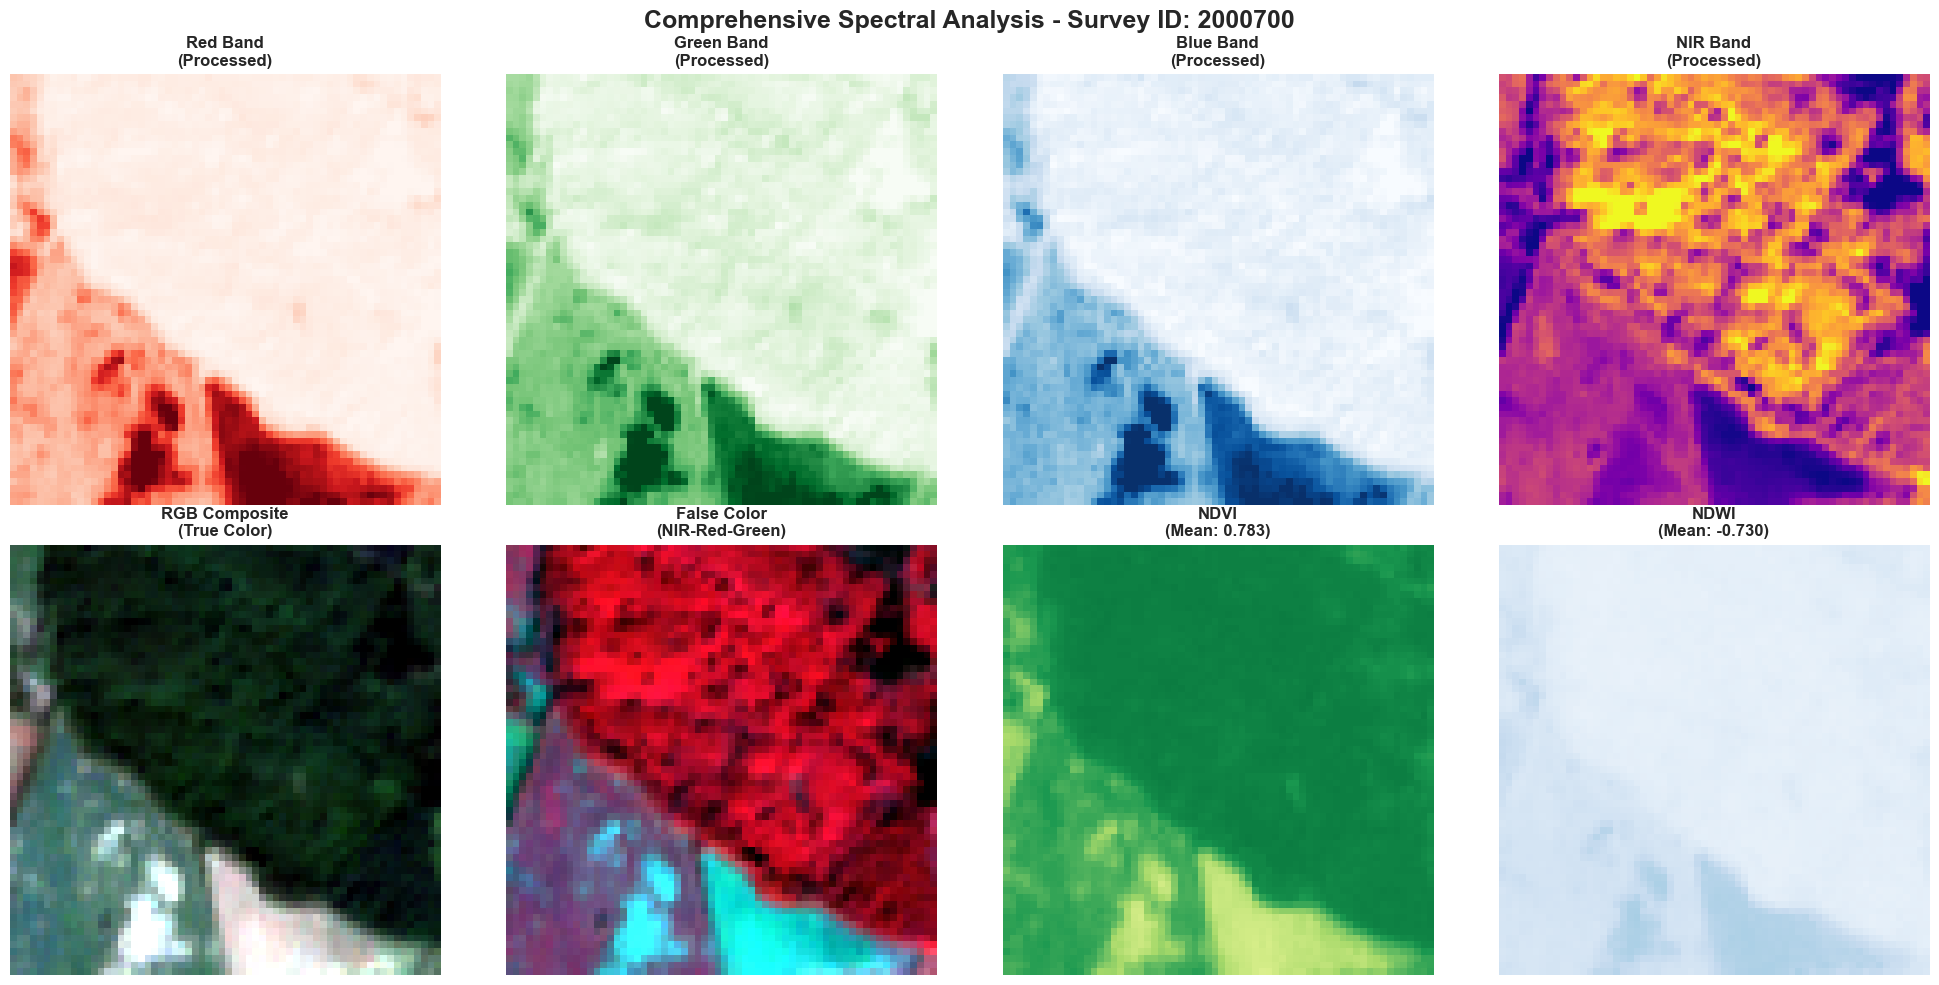


📊 DETAILED SPECTRAL STATISTICS - Survey ID: 2000700
Index      Mean     Std      Min      Max      Description                        
------------------------------------------------------------------------------------------
NDVI       0.783    0.172    0.191    0.916    Normalized Difference Vegetation Index
NDWI       -0.730   0.130    -0.856   -0.315   Normalized Difference Water Index  
EVI        2.137    0.548    0.326    2.963    Enhanced Vegetation Index          
SAVI       1.175    0.258    0.287    1.374    ⭐ Soil Adjusted Vegetation Index   
SR         12.497   6.135    1.472    22.807   ⭐ Simple Ratio (NIR/Red)           
GNDVI      0.730    0.130    0.315    0.856    Green Normalized Difference Vegetation
ARVI       0.934    0.103    0.504    1.021    Atmospherically Resistant Vegetation
MSAVI      0.865    0.135    0.321    0.956    Modified Soil Adjusted Vegetation  
------------------------------------------------------------------------------------------

📖 INTERPRE

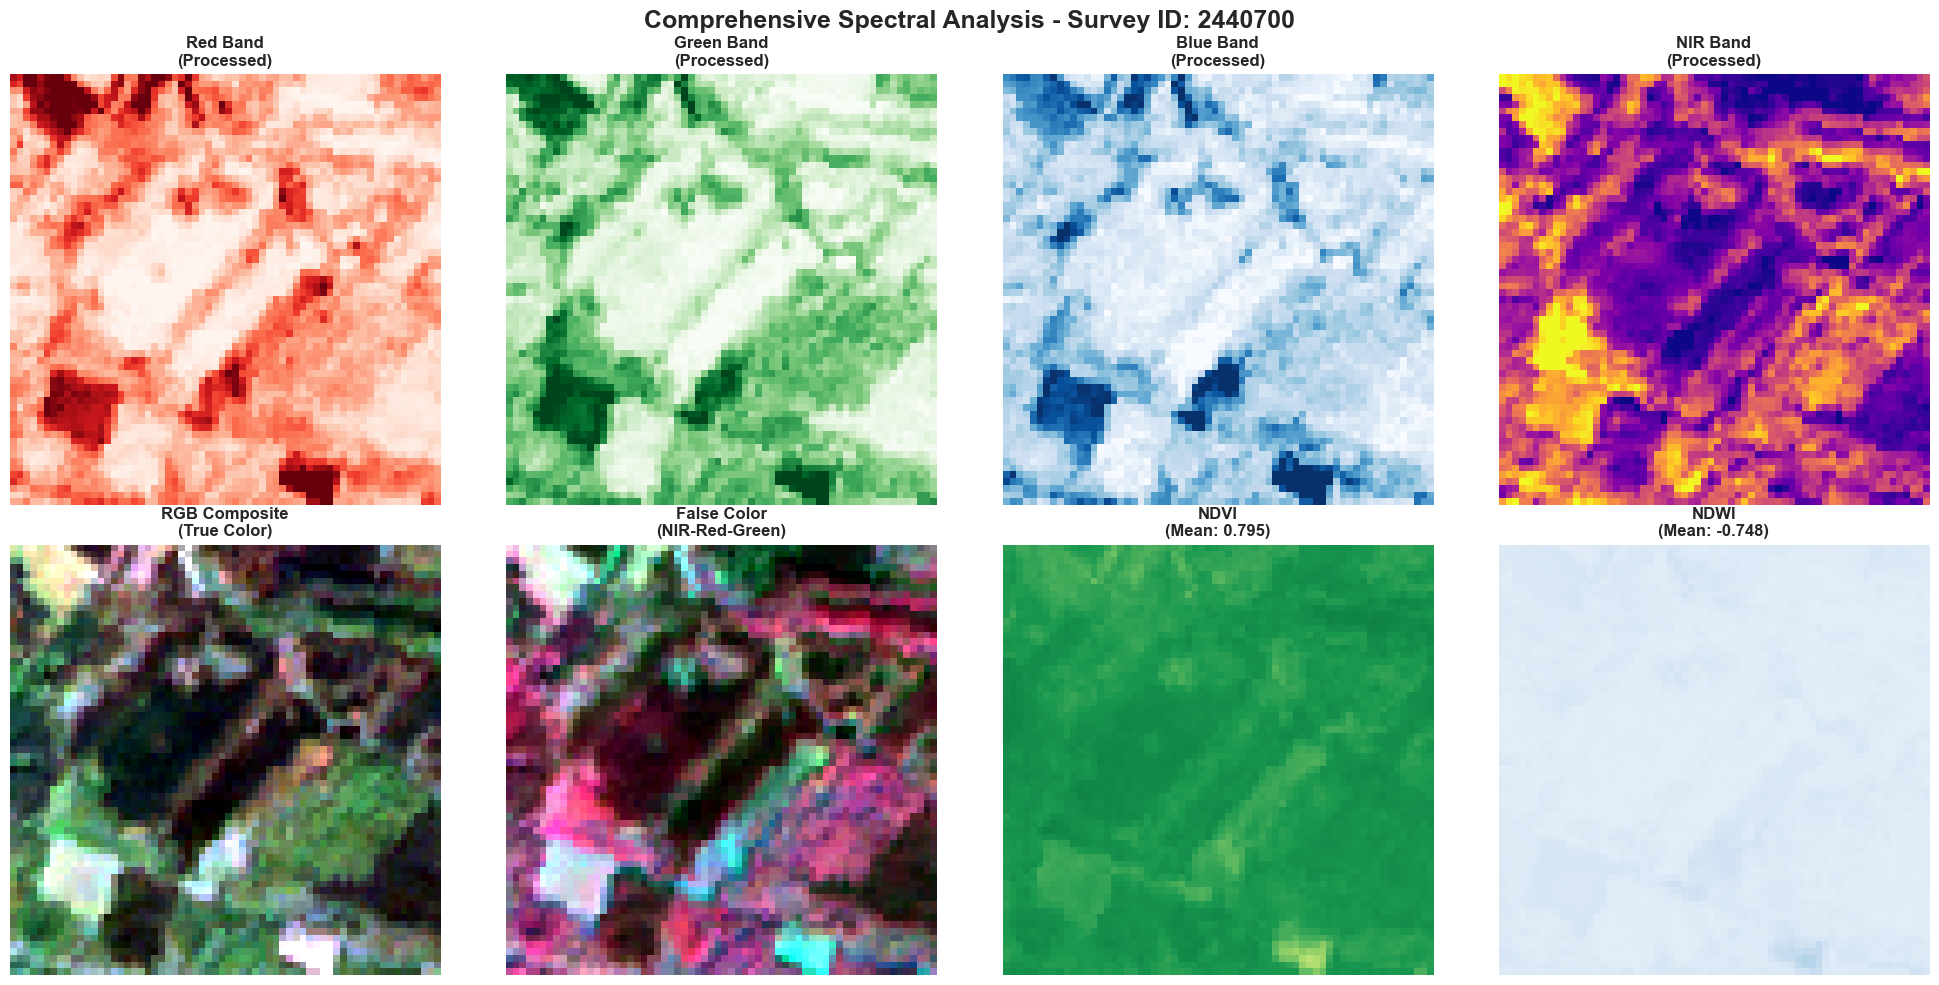


📊 DETAILED SPECTRAL STATISTICS - Survey ID: 2440700
Index      Mean     Std      Min      Max      Description                        
------------------------------------------------------------------------------------------
NDVI       0.795    0.053    0.320    0.886    Normalized Difference Vegetation Index
NDWI       -0.748   0.040    -0.818   -0.381   Normalized Difference Water Index  
EVI        2.055    0.244    0.696    2.666    Enhanced Vegetation Index          
SAVI       1.193    0.080    0.479    1.329    ⭐ Soil Adjusted Vegetation Index   
SR         9.295    2.206    1.940    16.606   ⭐ Simple Ratio (NIR/Red)           
GNDVI      0.748    0.040    0.381    0.818    Green Normalized Difference Vegetation
ARVI       0.933    0.036    0.664    1.006    Atmospherically Resistant Vegetation
MSAVI      0.885    0.036    0.484    0.940    Modified Soil Adjusted Vegetation  
------------------------------------------------------------------------------------------

📖 INTERPRE

In [5]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rasterio
from rasterio.plot import show
import os
from pathlib import Path
import cv2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore")


def find_available_images(
    base_path="../../geolifeclef-2025/SatelitePatches/PA-train", max_search=100
):
    """
    Search for available satellite images in the directory structure.
    This helps identify what images are actually available.
    """
    print(f"🔎 SEARCHING FOR AVAILABLE IMAGES in {base_path}")
    print("=" * 60)

    available_images = []

    if not os.path.exists(base_path):
        print(f"❌ Base path does not exist: {base_path}")
        return available_images

    # Search through CD folders (00-99)
    for cd in range(100):
        cd_str = f"{cd:02d}"
        cd_path = os.path.join(base_path, cd_str)

        if os.path.exists(cd_path):
            print(f"📁 Found CD folder: {cd_str}")

            # Search through AB folders (00-99)
            for ab in range(100):
                ab_str = f"{ab:02d}"
                ab_path = os.path.join(cd_path, ab_str)

                if os.path.exists(ab_path):
                    print(f"   📁 Found AB folder: {ab_str}")

                    # Look for .tiff files
                    try:
                        tiff_files = [
                            f for f in os.listdir(ab_path) if f.endswith(".tiff")
                        ]
                        if tiff_files:
                            print(
                                f"      📄 Found {len(tiff_files)} TIFF files: {tiff_files[:5]}..."
                            )
                            for tiff_file in tiff_files[:5]:  # Limit to first 5 files
                                survey_id = tiff_file.replace(".tiff", "")
                                full_path = os.path.join(ab_path, tiff_file)
                                available_images.append(
                                    {
                                        "survey_id": survey_id,
                                        "cd": cd_str,
                                        "ab": ab_str,
                                        "path": full_path,
                                    }
                                )

                        if len(available_images) >= max_search:
                            break
                    except PermissionError:
                        print(f"      ⚠️  Permission denied accessing {ab_path}")

                if len(available_images) >= max_search:
                    break

            if len(available_images) >= max_search:
                break

    print(f"\n📊 SUMMARY: Found {len(available_images)} available images")
    if available_images:
        print("\nFirst few examples:")
        for img in available_images[:10]:
            print(
                f"   {img['survey_id']} -> {img['cd']}/{img['ab']}/{img['survey_id']}.tiff"
            )

    return available_images


# Enhanced satellite image processing functions with all spectral indices
def quantile_normalize(band, low=2, high=98):
    """Normalize the band based on quantiles and rescale to [0, 255]."""
    if band.size == 0:
        return band

    # Remove any NaN or infinite values
    band_clean = band[np.isfinite(band)]
    if band_clean.size == 0:
        return np.zeros_like(band, dtype=np.uint8)

    # Calculate quantiles
    low_val = np.percentile(band_clean, low)
    high_val = np.percentile(band_clean, high)

    # Avoid division by zero
    if high_val == low_val:
        return np.full_like(band, 128, dtype=np.uint8)

    # Clip and normalize
    normalized_band = np.clip(band, low_val, high_val)
    normalized_band = (normalized_band - low_val) / (high_val - low_val)

    return safe_rescale_to_255(normalized_band)


def safe_rescale_to_255(normalized_array):
    """Safely rescale normalized array to [0, 255] range."""
    return np.clip(normalized_array * 255, 0, 255).astype(np.uint8)


def get_image_path(
    survey_id, base_path="../../geolifeclef-2025/SatelitePatches/PA-train"
):
    """Generate image path based on surveyId with corrected folder structure."""
    survey_str = str(survey_id)
    padded_survey = survey_str.zfill(4)
    last_4 = padded_survey[-4:]
    cd = last_4[-2:]
    ab = last_4[-4:-2]
    return os.path.join(base_path, cd, ab, f"{survey_id}.tiff")


def calculate_comprehensive_spectral_indices(bands, use_processed=False):
    """Calculate ALL spectral indices including SR and SAVI with proper visualization ranges."""
    if bands is None or bands.shape[0] < 4:
        return None

    # Convert to float for calculations
    if use_processed:
        # Convert processed (0-255) back to normalized (0-1) for index calculations
        red = bands[0].astype(np.float32) / 255.0
        green = bands[1].astype(np.float32) / 255.0
        blue = bands[2].astype(np.float32) / 255.0
        nir = bands[3].astype(np.float32) / 255.0
    else:
        # Use raw values directly
        red = bands[0].astype(np.float32)
        green = bands[1].astype(np.float32)
        blue = bands[2].astype(np.float32)
        nir = bands[3].astype(np.float32)

    indices = {}

    # 1. NDVI (Normalized Difference Vegetation Index)
    # Range: -1 to +1 (higher values = more vegetation)
    ndvi_denom = nir + red
    indices["NDVI"] = np.where(ndvi_denom != 0, (nir - red) / ndvi_denom, 0)

    # 2. NDWI (Normalized Difference Water Index)
    # Range: -1 to +1 (higher values = more water)
    ndwi_denom = green + nir
    indices["NDWI"] = np.where(ndwi_denom != 0, (green - nir) / ndwi_denom, 0)

    # 3. EVI (Enhanced Vegetation Index)
    # Range: -1 to +1 (similar to NDVI but less sensitive to atmospheric effects)
    evi_denom = nir + 6 * red - 7.5 * blue + 1
    indices["EVI"] = np.where(evi_denom != 0, 2.5 * (nir - red) / evi_denom, 0)

    # 4. SAVI (Soil Adjusted Vegetation Index) ⭐
    # Range: -1.5 to +1.5 (accounts for soil brightness, L=0.5 is typical)
    L = 0.5  # Soil brightness correction factor
    savi_denom = nir + red + L
    indices["SAVI"] = np.where(savi_denom != 0, (1 + L) * (nir - red) / savi_denom, 0)

    # 5. Simple Ratio (SR) ⭐
    # Range: 0 to infinity (typical vegetation: 2-8, higher = more vegetation)
    indices["SR"] = np.where(red != 0, nir / red, 0)

    # 6. GNDVI (Green Normalized Difference Vegetation Index)
    # Range: -1 to +1 (sensitive to chlorophyll content)
    gndvi_denom = nir + green
    indices["GNDVI"] = np.where(gndvi_denom != 0, (nir - green) / gndvi_denom, 0)

    # 7. ARVI (Atmospherically Resistant Vegetation Index)
    # Range: -1 to +1 (resistant to atmospheric effects)
    arvi_denom = nir + red - blue
    indices["ARVI"] = np.where(arvi_denom != 0, (nir - red + blue) / arvi_denom, 0)

    # 8. MSAVI (Modified Soil Adjusted Vegetation Index)
    # Range: -1 to +1 (improved SAVI version)
    msavi_term = (2 * nir + 1) - np.sqrt((2 * nir + 1) ** 2 - 8 * (nir - red))
    indices["MSAVI"] = msavi_term / 2

    return indices


def load_and_process_satellite_image(
    survey_id,
    base_path="../../geolifeclef-2025/SatelitePatches/PA-train",
    normalize_method="quantile",
    **normalize_kwargs,
):
    """Load satellite image and return both raw and processed versions."""
    image_path = get_image_path(survey_id, base_path)

    print(f"🔍 Loading: {image_path}")

    try:
        if not os.path.exists(image_path):
            print(f"   ❌ File does not exist")
            return None, None, None

        with rasterio.open(image_path) as src:
            # Read all bands
            raw_bands = src.read()  # Shape: (4, 64, 64)

            print(f"   ✅ Raw data loaded - Shape: {raw_bands.shape}")
            print(
                f"      Raw value range: [{raw_bands.min():.2f}, {raw_bands.max():.2f}]"
            )

            # Process each band using quantile normalization
            processed_bands = np.zeros_like(raw_bands, dtype=np.uint8)

            band_names = ["Red", "Green", "Blue", "NIR"]
            print(f"   🔧 Processing bands:")

            for i in range(raw_bands.shape[0]):
                processed_bands[i] = quantile_normalize(
                    raw_bands[i],
                    normalize_kwargs.get("low", 2),
                    normalize_kwargs.get("high", 98),
                )

                raw_stats = f"[{raw_bands[i].min():.1f}, {raw_bands[i].max():.1f}]"
                proc_stats = f"[{processed_bands[i].min()}, {processed_bands[i].max()}]"
                print(f"      {band_names[i]:>5}: {raw_stats} → {proc_stats}")

            # Get metadata
            metadata = {
                "crs": src.crs,
                "transform": src.transform,
                "bounds": src.bounds,
                "width": src.width,
                "height": src.height,
                "count": src.count,
                "file_path": image_path,
                "normalization": normalize_method,
            }

            return raw_bands, processed_bands, metadata

    except Exception as e:
        print(f"   ❌ Error loading image: {e}")
        return None, None, None


def create_comprehensive_spectral_analysis(
    survey_ids, base_path="../../geolifeclef-2025/SatelitePatches/PA-train"
):
    """Create comprehensive analysis showing ALL spectral indices including SR and SAVI."""

    successful_loads = []

    print(survey_ids)

    print(f"\n🚀 COMPREHENSIVE SPECTRAL ANALYSIS")
    print("=" * 80)

    for survey_id in survey_ids:
        print(f"\n📍 Processing surveyId: {survey_id}")
        raw_bands, processed_bands, metadata = load_and_process_satellite_image(
            survey_id, base_path
        )

        if processed_bands is not None:
            successful_loads.append((survey_id, raw_bands, processed_bands, metadata))

        if len(successful_loads) >= 2:  # Limit to 2 images for detailed analysis
            break

    if not successful_loads:
        print("❌ No images loaded successfully")
        return

    # Create comprehensive visualization for each loaded image
    for survey_id, raw_bands, processed_bands, metadata in successful_loads:
        create_detailed_spectral_visualization(
            survey_id, raw_bands, processed_bands, metadata
        )

    return successful_loads


def create_detailed_spectral_visualization(
    survey_id, raw_bands, processed_bands, metadata
):
    """Create detailed visualization showing all spectral indices for one image."""

    print(f"🎨 Creating comprehensive spectral analysis for surveyId {survey_id}...")

    # Calculate all spectral indices
    indices = calculate_comprehensive_spectral_indices(raw_bands, use_processed=False)

    if not indices:
        print("❌ Could not calculate spectral indices")
        return

    # Create the main visualization (4 rows x 4 columns)
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    fig.suptitle(
        f"Comprehensive Spectral Analysis - Survey ID: {survey_id}",
        fontsize=18,
        fontweight="bold",
    )

    # Row 1: Original bands (processed for better visualization)
    band_names = ["Red Band", "Green Band", "Blue Band", "NIR Band"]
    band_cmaps = ["Reds", "Greens", "Blues", "plasma"]

    for i, (band_name, cmap) in enumerate(zip(band_names, band_cmaps)):
        ax = axes[0, i]
        im = ax.imshow(processed_bands[i], cmap=cmap)
        ax.set_title(f"{band_name}\n(Processed)", fontsize=12, fontweight="bold")
        ax.axis("off")
        # plt.colorbar(im, ax=ax, shrink=0.7)

    # Row 2: RGB Composite and False Color
    ax = axes[1, 0]
    rgb_composite = np.dstack(
        [processed_bands[0], processed_bands[1], processed_bands[2]]
    )
    ax.imshow(rgb_composite)
    ax.set_title("RGB Composite\n(True Color)", fontsize=12, fontweight="bold")
    ax.axis("off")

    ax = axes[1, 1]
    false_color = np.dstack(
        [processed_bands[3], processed_bands[0], processed_bands[1]]
    )
    ax.imshow(false_color)
    ax.set_title("False Color\n(NIR-Red-Green)", fontsize=12, fontweight="bold")
    ax.axis("off")

    # NDVI and NDWI
    ax = axes[1, 2]
    ndvi_plot = ax.imshow(indices["NDVI"], cmap="RdYlGn", vmin=-1, vmax=1)
    ndvi_mean = np.mean(indices["NDVI"])
    ax.set_title(f"NDVI\n(Mean: {ndvi_mean:.3f})", fontsize=12, fontweight="bold")
    ax.axis("off")
    # plt.colorbar(ndvi_plot, ax=ax, shrink=0.7)

    ax = axes[1, 3]
    ndwi_plot = ax.imshow(indices["NDWI"], cmap="Blues", vmin=-1, vmax=1)
    ndwi_mean = np.mean(indices["NDWI"])
    ax.set_title(f"NDWI\n(Mean: {ndwi_mean:.3f})", fontsize=12, fontweight="bold")
    ax.axis("off")
    # plt.colorbar(ndwi_plot, ax=ax, shrink=0.7)

    plt.tight_layout()
    plt.savefig(
        f"Comprehensive_Spectral_Analysis_{survey_id}.png", dpi=300, bbox_inches="tight"
    )
    plt.show()

    # Create detailed statistics table
    create_spectral_statistics_table(survey_id, indices)


def create_spectral_statistics_table(survey_id, indices):
    """Create a detailed statistics table for all spectral indices."""

    print(f"\n📊 DETAILED SPECTRAL STATISTICS - Survey ID: {survey_id}")
    print("=" * 90)
    print(
        f"{'Index':<10} {'Mean':<8} {'Std':<8} {'Min':<8} {'Max':<8} {'Description':<35}"
    )
    print("-" * 90)

    descriptions = {
        "NDVI": "Normalized Difference Vegetation Index",
        "NDWI": "Normalized Difference Water Index",
        "EVI": "Enhanced Vegetation Index",
        "SAVI": "⭐ Soil Adjusted Vegetation Index",
        "SR": "⭐ Simple Ratio (NIR/Red)",
        "GNDVI": "Green Normalized Difference Vegetation",
        "ARVI": "Atmospherically Resistant Vegetation",
        "MSAVI": "Modified Soil Adjusted Vegetation",
    }

    for idx_name, idx_data in indices.items():
        if idx_name in descriptions:
            mean_val = np.mean(idx_data)
            std_val = np.std(idx_data)
            min_val = np.min(idx_data)
            max_val = np.max(idx_data)
            desc = descriptions[idx_name]

            print(
                f"{idx_name:<10} {mean_val:<8.3f} {std_val:<8.3f} {min_val:<8.3f} {max_val:<8.3f} {desc:<35}"
            )

    print("-" * 90)

    # Interpretation guide
    print(f"\n📖 INTERPRETATION GUIDE:")
    print(f"⭐ SAVI (Soil Adjusted Vegetation Index):")
    print(f"   • Range: -1.5 to +1.5")
    print(f"   • Accounts for soil brightness effects")
    print(f"   • L=0.5 factor reduces soil background influence")
    print(f"   • Higher values = more vegetation, less soil interference")
    print(f"   • Current mean: {np.mean(indices['SAVI']):.3f}")

    print(f"\n⭐ Simple Ratio (SR):")
    print(f"   • Range: 0 to infinity (typically 0-10 for vegetation)")
    print(f"   • Formula: NIR / Red")
    print(f"   • Healthy vegetation: 2-8, Stressed vegetation: 1-2")
    print(f"   • Water/bare soil: <1, Dense vegetation: >8")
    print(f"   • Current mean: {np.mean(indices['SR']):.3f}")

    # Vegetation health assessment
    savi_mean = np.mean(indices["SAVI"])
    sr_mean = np.mean(indices["SR"])

    print(f"\n🌱 VEGETATION HEALTH ASSESSMENT:")
    if savi_mean > 0.4:
        savi_health = "Dense/Healthy vegetation"
    elif savi_mean > 0.2:
        savi_health = "Moderate vegetation"
    elif savi_mean > 0.1:
        savi_health = "Sparse vegetation"
    else:
        savi_health = "Little/No vegetation"

    if sr_mean > 4:
        sr_health = "Healthy/Dense vegetation"
    elif sr_mean > 2:
        sr_health = "Moderate vegetation"
    elif sr_mean > 1:
        sr_health = "Stressed vegetation"
    else:
        sr_health = "Non-vegetated/Water/Bare soil"

    print(f"   SAVI Assessment: {savi_health}")
    print(f"   SR Assessment: {sr_health}")


# Main execution
print("🎯 COMPREHENSIVE SPECTRAL ANALYSIS INCLUDING SAVI AND SR")
print("=" * 80)


# Search for available images in the directory
print("\n" + "=" * 80)
print("SEARCHING FOR AVAILABLE SATELLITE IMAGES")
print("=" * 80)

available_images = find_available_images()

if available_images:
    # Use actually available images for analysis
    available_survey_ids = [img["survey_id"] for img in available_images[34:40]]
    print(f"\n🎯 Using available surveyIds: {available_survey_ids}")

    # Perform comprehensive analysis
    successful_loads = create_comprehensive_spectral_analysis(available_survey_ids)


print("\n" + "=" * 80)
print("SPECTRAL INDICES ANALYSIS SUMMARY")
print("=" * 80)
print("""
✅ COMPREHENSIVE SPECTRAL INDICES IMPLEMENTED:

🌿 VEGETATION INDICES:
   ⭐ SAVI (Soil Adjusted Vegetation Index)
      • Reduces soil background effects
      • Range: -1.5 to +1.5
      • L=0.5 correction factor

   ⭐ Simple Ratio (SR)
      • Basic but effective: NIR/Red
      • Range: 0 to infinity
      • Easy to interpret

   ✓ NDVI (Normalized Difference Vegetation)
   ✓ EVI (Enhanced Vegetation Index)
   ✓ GNDVI (Green NDVI)
   ✓ ARVI (Atmospherically Resistant)
   ✓ MSAVI (Modified SAVI)

💧 WATER INDEX:
   ✓ NDWI (Normalized Difference Water Index)

📊 VISUALIZATIONS:
   ✓ Individual index maps with appropriate colormaps
   ✓ Statistical comparisons and correlations
   ✓ Vegetation health assessments
   ✓ SR vs NDVI relationship analysis
   ✓ Comprehensive statistics table

🎯 KEY FEATURES:
   ✓ Post-processed bands for better visualization
   ✓ Proper value ranges for each index
   ✓ Interpretation guidelines
   ✓ Health assessment based on index values
   ✓ Correlation analysis between indices
""")